In [1]:

# Tech Companies - Merger and Acquisitions Dataset - Software Companies
# This dataset contains the list of acquisitions made by the following companies:

# Microsoft, Google, IBM, Hp, Apple, Amazon, Facebook, Twitter, eBay, Adobe, Citrix, Redhat, Blackberry, Disney

# The attributes include the date, year, month of the acquisition, name of the company acquired, value or the cost of acquisition, business use-case of the acquisition, and the country from which the acquisition was made. The source of the dataset is Wikipedia, TechCrunch, and CrunchBase.

# Interesting Tasks and Analysis Ideas
# Which company makes the acquisitions quickly
# What is the trend of business use-cases among the acquired companies throughout the years
# What can be forecasted for upcoming years in terms of acquisitions
# Predict who is likely to make next acquisitions and when


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Read data
data = pd.read_csv("acquisitions_update_2021.csv")
# Check the shape of data
data.shape

(1455, 10)

In [8]:
# List all columns
data.columns

Index(['ID', 'Parent Company', 'Acquisition Year', 'Acquisition Month',
       'Acquired Company', 'Business', 'Country', 'Acquisition Price',
       'Category', 'Derived Products'],
      dtype='object')

In [9]:
# Also, let us view first 5 row entries to see how the data looks like.
data.head()

,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
0,1,Apple,1988,Mar,Network Innovations,Software,-,-,-,-
1,2,Apple,1988,Jun,Orion Network Systems,Computer Software,-,-,-,-
2,3,Apple,1988,Jun,Styleware,Computer software,-,-,-,-
3,4,Apple,1988,Jul,Nashoba Systems,Computer software,-,-,-,-
4,5,Apple,1989,Jan,Coral Software,Computer software,-,-,-,-


In [11]:
# Also, a quick glance at last five row entries
data.tail()

,ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products
1450,1451,Citrix,2015,Apr,Grasshopper,Telephone services,United States,-,-,"GoToMeeting, GoToTraining, GoToWebinar, ShareF..."
1451,1452,Citrix,2016,Sep,Norskale,UEM and application performance optimization,France,-,-,"XenApp, XenDesktop"
1452,1453,Citrix,2017,Jan,Unidesk,-,United States,-,-,"XenApp, XenDesktop"
1453,1454,Citrix,2018,Feb,Cedexis,Intelligent traffic management,France,-,-,Citrix ITM
1454,1455,Citrix,2021,Mar,Wrike,Project management,United States,-,-,Citrix Workspace


In [13]:
# Let's check column types and some statistics info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 1455 non-null   int64 
 1   Parent Company     1455 non-null   object
 2   Acquisition Year   1455 non-null   object
 3   Acquisition Month  1455 non-null   object
 4   Acquired Company   1455 non-null   object
 5   Business           1455 non-null   object
 6   Country            1455 non-null   object
 7   Acquisition Price  1455 non-null   object
 8   Category           1455 non-null   object
 9   Derived Products   1455 non-null   object
dtypes: int64(1), object(9)
memory usage: 113.8+ KB


In [14]:
# Acquisition Month Date and Value are float64 type. These have to be converted to numeric type later
# Also, missing values

# We can see that all columns do not have equal number of entries, which implies missing values. Missing values must be handled in the data by either -

# Dropping them - which is better only if there are very few entries missing and dataset is large enough.
# Imputing them - replacing with zero, mean, median or mode of the attribute for numeric types and with "None" for categorical type.
# We will find exactly how many missing values exist in each column.

In [16]:
data.isnull().sum()

ID                   0
Parent Company       0
Acquisition Year     0
Acquisition Month    0
Acquired Company     0
Business             0
Country              0
Acquisition Price    0
Category             0
Derived Products     0
dtype: int64

In [22]:
data = data.replace("-", np.nan)
data
df = data

In [23]:
# Converting columns into numerical values
df['Acquisition Year'] = pd.to_numeric(df['Acquisition Year'], errors='coerce')
df['Acquisition Price'] = pd.to_numeric(df['Acquisition Price'], errors='coerce')

# Rename the column, per a billion
df = df.rename({'Acquisition Price': 'Acquisition Price(Billions)'}, axis=1)

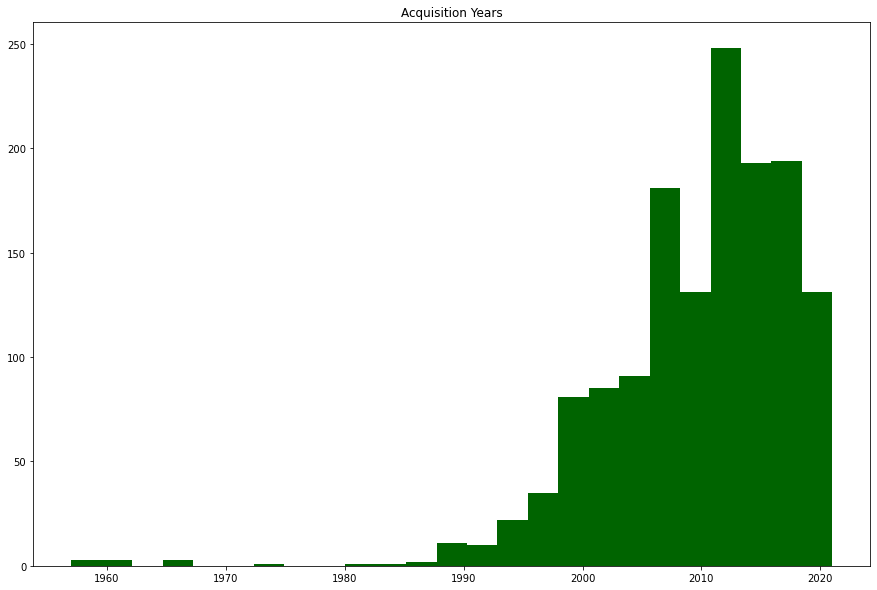

In [27]:
plt.figure(figsize=(15,10))
plt.title('Acquisition Years')
plt.hist(df['Acquisition Year'], bins=25, color='darkgreen');

In [28]:
# It appears that the number of acquisitions by tech companies have dramatically increased since the 1990s. This is somewhat 
# representative of the Tech Industry which had a dramatic growth period in the 1990s.

In [29]:
# Which companies have the highest number of acquisitions?

In [30]:
companies = df['Parent Company'].value_counts()
companies_df = companies.to_frame().reset_index()
companies_df = companies_df.rename({'index': 'Parent Company', 'Parent Company': 'Acquisitions'}, axis=1)

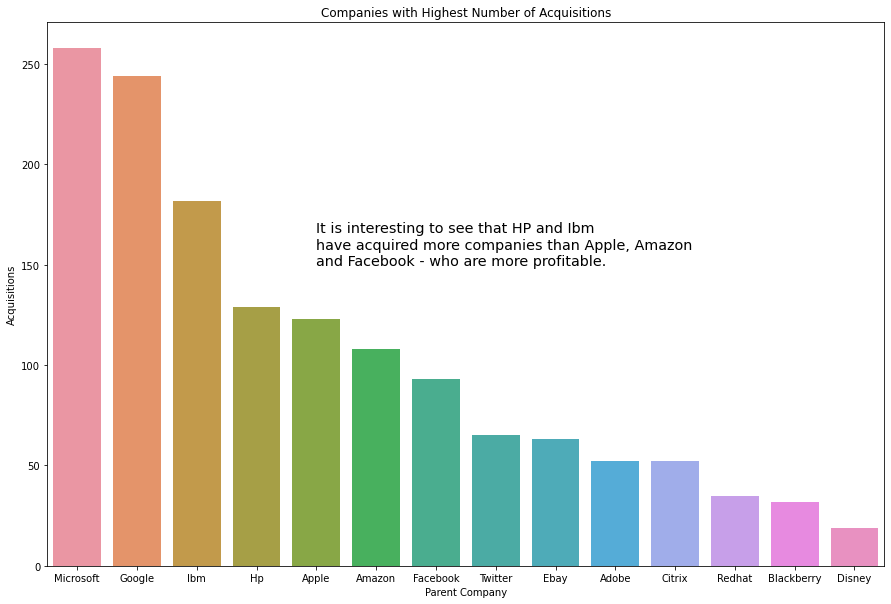

In [32]:
text = ('It is interesting to see that HP and Ibm' + '\n' + 'have acquired more companies than Apple, Amazon' + 
        '\n' + 'and Facebook - who are more profitable.')

plt.figure(figsize=(15,10))
plt.title('Companies with Highest Number of Acquisitions')
sns.barplot(x='Parent Company', y='Acquisitions', data=companies_df)
plt.text(x=4, y=150, s=text, size='x-large');

In [33]:
# Observation:
# It is seems that companies who have a stronger focus on computer software have a higher number of acquisitions. Perhaps this 
# is because companies that specialize in computer software generate more revenue that supports these acquisitions.

In [34]:
# What are the most popular businesses to acquire?

In [35]:
business = df['Business'].value_counts()
business_df = business.to_frame().reset_index()
business_df = business_df.rename({'index': 'Business', 'Business': 'Total'}, axis=1)

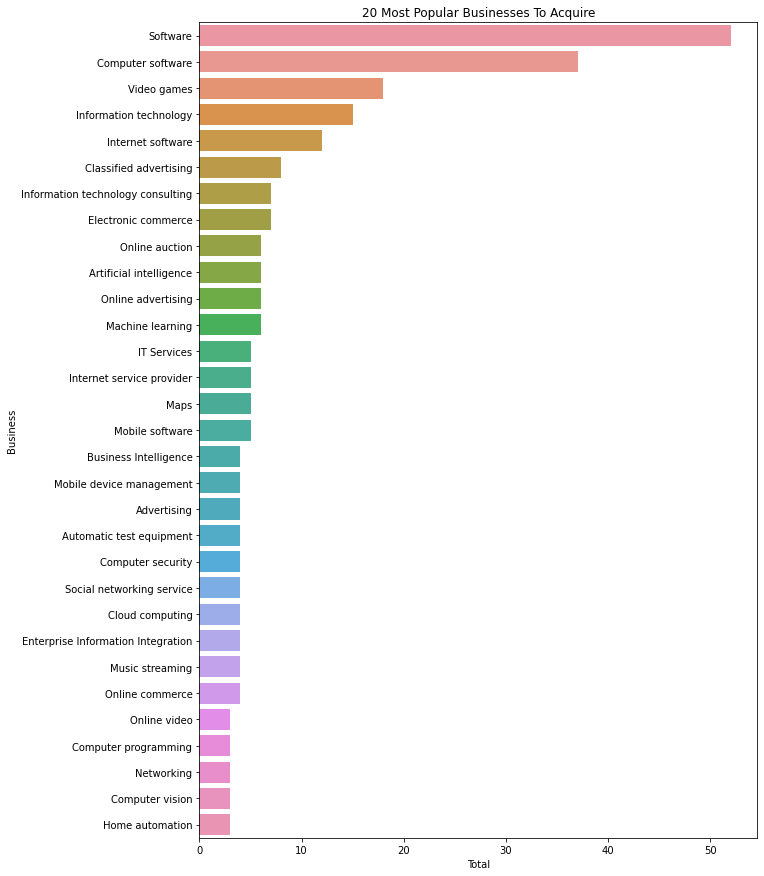

In [36]:
plt.figure(figsize=(10,15))
plt.title('20 Most Popular Businesses To Acquire')
sns.barplot(x='Total', y='Business', data=business_df[:31]);

In [37]:
# Observation:
# It appears that there is a disproportionately high number of software businesses that were acquired by tech companies. 
# This supports our earlier observation that businesses that have a strong focus on Software may generate more revenue.

In [38]:
# What is the trend of the Acquisition Price

mask = df['Acquisition Year'].notnull() & df['Acquisition Price(Billions)'].notnull()
price_df = df[mask]

price_df = price_df[price_df['Acquisition Year'] > 1987]

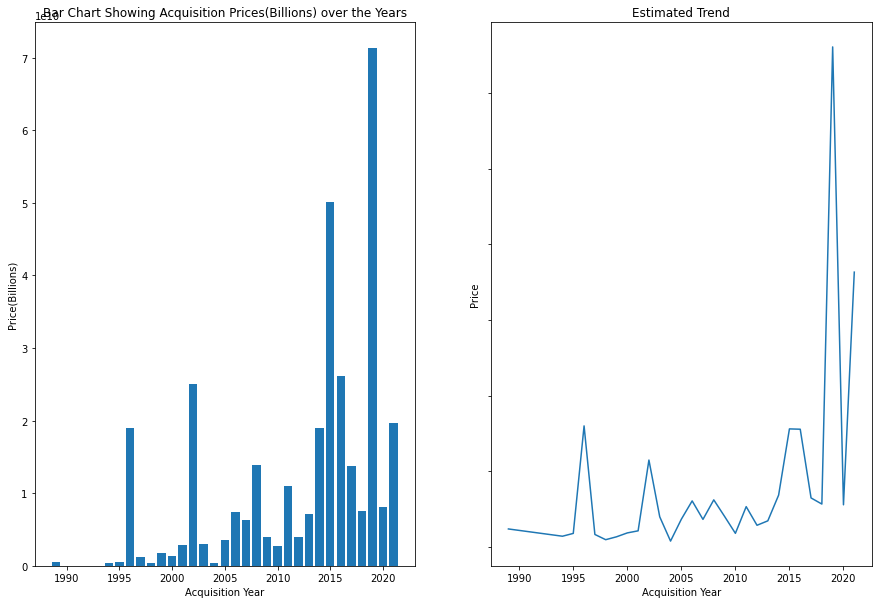

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Bar Chart
axes[0].set_title('Bar Chart Showing Acquisition Prices(Billions) over the Years')
axes[0].bar('Acquisition Year', 'Acquisition Price(Billions)', data=price_df)
axes[0].set_xlabel('Acquisition Year')
axes[0].set_ylabel('Price(Billions)')



# Trend
axes[1].set_title('Estimated Trend')
sns.lineplot(data=price_df, x='Acquisition Year', y='Acquisition Price(Billions)', ax=axes[1], ci=None)
axes[1].set_ylabel('Price')



axes[1].yaxis.set_ticklabels([]);

In [40]:
# Observation:
# If we observe the bar chart, we can tell that that the acquisition prices are very volatile. However, 
# it seems that the prices have been increasing since 1990 
# despite the volatility. It is interesting to see that downturns in the trend matches periods of great economic decline.

In [41]:
# What were the most expensive companies to acquire?

In [42]:
expense_df = df.sort_values(by=['Acquisition Price(Billions)'], ascending=False)
num = expense_df.iloc[:20]['Acquisition Year'].astype(int)
exp = expense_df.iloc[:20]
exp = exp.reset_index(drop=True)
num = num.reset_index(drop=True)
exp.loc[:, 'Acquisition Year'] = num
exp[['Parent Company',  'Acquisition Price(Billions)', 'Acquired Company', 'Acquisition Year']]

,Parent Company,Acquisition Price(Billions),Acquired Company,Acquisition Year
0,Disney,7.130000e+10,21st Century Fox,2019
1,Twitter,5.010000e+10,Periscope,2015
2,Ibm,3.400000e+10,Red Hat,2019
3,Microsoft,2.620000e+10,LinkedIn,2016
4,Hp,2.500000e+10,Compaq,2002
5,Microsoft,1.970000e+10,Nuance Communications,2021
6,Facebook,1.900000e+10,WhatsApp,2014
7,Disney,1.900000e+10,Capital Cities/ABC Inc.,1996
8,Hp,1.390000e+10,Electronic Data Systems,2008
9,Amazon,1.370000e+10,Whole Foods Market,2017


In [43]:
# Observation
# The information on in the table above supports our earlier conclusion that acquisition prices were higher in 
# the more recent years. The most expensive company to acquire was 21st Century Fox in the year 2019.

In [44]:
df['Category'].value_counts()

Twitter Cortex              2
Mobile Twitter app (iOS)    1
Analytics tools             1
Revenue team                1
Revenue engineering team    1
Design                      1
MoPub                       1
Commerce                    1
Twitter Spaces              1
Name: Category, dtype: int64

In [45]:
# We can see that there is very little 
# information we can get from the Category. However, it seems Twitter was more diligent in recording the categories.

In [46]:
# Where are the acquisitions of companies concentrated?

In [47]:
country = df['Country'].value_counts()
country_df = country.to_frame().reset_index()
country_df = country_df.rename({'index': 'Country', 'Country': 'Total'}, axis=1)

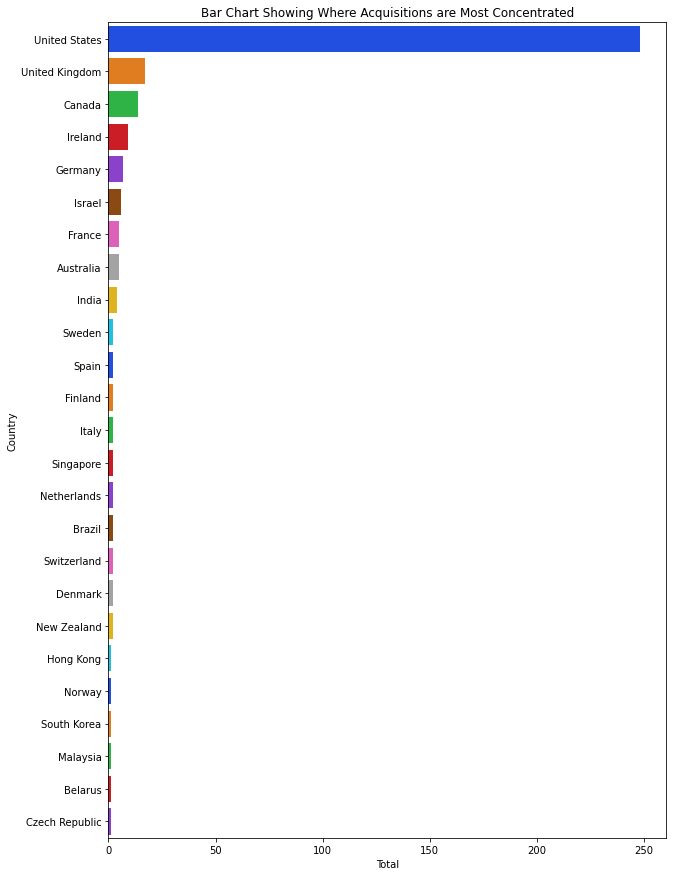

In [48]:
plt.figure(figsize=(10,15))
plt.title('Bar Chart Showing Where Acquisitions are Most Concentrated')
sns.barplot(x='Total', y='Country', data=country_df, palette='bright');

In [49]:
# Observation
# It appears that there is a disproportionately high number of 
# companies that were acquired from the United States. 
# This is matches what we know of the Tech Industry - that the United States
# is home to the largest tech companies. However, we can already see that 
# the countries provided are not representative of the entire number of companies acquired. 
# We only know 341 country location out of the 1455 companies acquired.

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           1455 non-null   int64  
 1   Parent Company               1455 non-null   object 
 2   Acquisition Year             1427 non-null   float64
 3   Acquisition Month            1397 non-null   object 
 4   Acquired Company             1455 non-null   object 
 5   Business                     1181 non-null   object 
 6   Country                      341 non-null    object 
 7   Acquisition Price(Billions)  383 non-null    float64
 8   Category                     10 non-null     object 
 9   Derived Products             403 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 113.8+ KB
